In [ ]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Colab Notebooks/Fingerprint/training_data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Colab Notebooks/Fingerprint/training_data'   

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (256,256), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (256,256), batch_size = 10, class_mode = 'categorical')

Found 527 images belonging to 5 classes.
Found 527 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'Electrican': 0, 'Engineer': 1, 'Famer': 2, 'teacher': 3, 'worker': 4}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9) # lr learning rate : tốc độ học
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset,epochs=10,batch_size=32,validation_data=validation_dataset,verbose=1)

Epoch 1/10
53/53 [==============================] - 274s 5s/step - loss: 7.2252 - accuracy: 0.3055 - val_loss: 1.5653 - val_accuracy: 0.3359
Epoch 2/10
53/53 [==============================] - 285s 5s/step - loss: 1.6524 - accuracy: 0.3340 - val_loss: 1.5715 - val_accuracy: 0.3359
Epoch 3/10
53/53 [==============================] - 279s 5s/step - loss: 1.5872 - accuracy: 0.3131 - val_loss: 1.5480 - val_accuracy: 0.3359
Epoch 4/10
53/53 [==============================] - 285s 5s/step - loss: 1.5798 - accuracy: 0.3397 - val_loss: 1.5426 - val_accuracy: 0.3359
Epoch 5/10
53/53 [==============================] - 279s 5s/step - loss: 1.5665 - accuracy: 0.3245 - val_loss: 1.5424 - val_accuracy: 0.3359
Epoch 6/10
53/53 [==============================] - 280s 5s/step - loss: 1.5664 - accuracy: 0.3283 - val_loss: 1.5302 - val_accuracy: 0.3359
Epoch 7/10
53/53 [==============================] - 278s 5s/step - loss: 1.5667 - accuracy: 0.3378 - val_loss: 1.5688 - val_accuracy: 0.3359
Epoch 8/10
53

In [ ]:
model.save('bai1.h5')

In [ ]:
bai1_model = load_model('bai1.h5')

In [ ]:
score=bai1_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

53/53 [==============================] - 62s 1s/step - loss: 1.5174 - accuracy: 0.3359
Test loss =  1.517401933670044
Test accuracy =  0.3358633816242218


1/1 [==============================] - 0s 421ms/step
Predict is:  worker


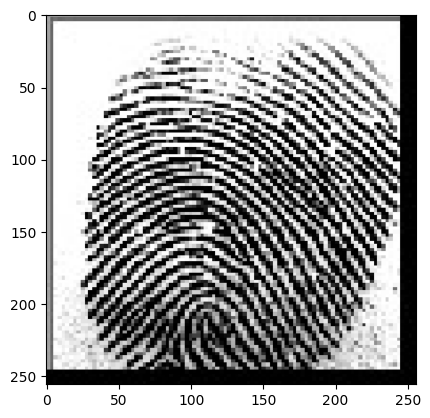

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Fingerprint/testing_data/Electrician (63).jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Electrcian','Engineer','famer','teacher','worker']
print('Predict is: ',Label[int(np.argmax(bai1_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 89ms/step
Predict is:  worker


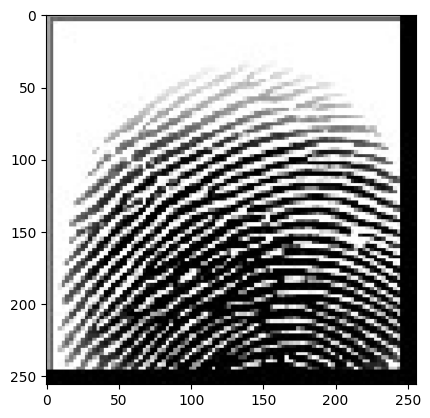

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Fingerprint/testing_data/Teacher (32).jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Electrcian','Engineer','famer','teacher','worker']
print('Predict is: ',Label[int(np.argmax(bai1_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 166ms/step
Predict is:  worker


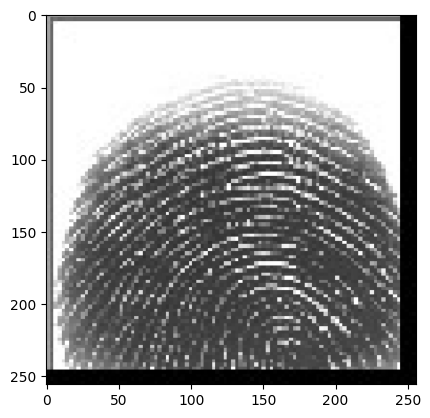

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Fingerprint/testing_data/Farmer (24).jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Electrcian','Engineer','famer','teacher','worker']
print('Predict is: ',Label[int(np.argmax(bai1_model.predict(img),axis=-1))])